In [1]:
# set up the python
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft
import cftime
import IPython.display
import sys, os, warnings

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/39663/status,
Dashboard: /proxy/39663/status,Workers: 4
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38591,Workers: 4
Dashboard: /proxy/39663/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://127.0.0.1:40365,Total threads: 4
Dashboard: /proxy/36641/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:38163,


In [3]:
# load the MOM6 data 
db='/g/data/ik11/outputs/mom6-panan/panant.db' 
expts = ['panant-v2','panant-01-hycom1','panant-01-zstar']

In [4]:
session = cc.database.create_session()

In [5]:
# time period
start_time = '1995-01-01'
end_time = '2000-01-01'

In [6]:
# get the depth
depth = cc.querying.getvar('panant-01-zstar','deptho',session,n=1)
land_mask = np.squeeze(depth.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)

In [27]:
# load MOM6 hmo(x,y,rho,t)
hmo = cc.querying.getvar('panant-01-hycom1','hmo',session,start_time=start_time, end_time=end_time)

In [28]:
# load MOM6 umo(x,y,rho,t)
umo = cc.querying.getvar('panant-01-hycom1','umo',session,start_time=start_time, end_time=end_time)

In [29]:
umo = umo/1e9

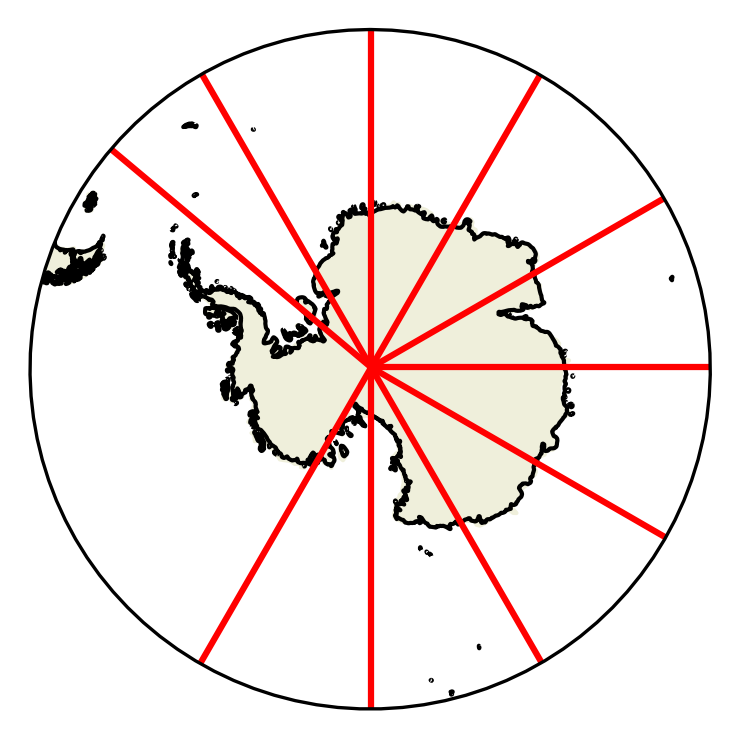

In [69]:
## plot the location of the transect
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(3, 3), dpi=300)
# flux1_upp
ax = plt.subplot(1,1,1,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
ax.plot([-50,-50],[-90,-50],color='r',transform=ccrs.PlateCarree())
ax.plot([-30,-30],[-90,-50],color='r',transform=ccrs.PlateCarree())
ax.plot([0,0],[-90,-50],color='r',transform=ccrs.PlateCarree())
ax.plot([30,30],[-90,-50],color='r',transform=ccrs.PlateCarree())
ax.plot([60,60],[-90,-50],color='r',transform=ccrs.PlateCarree())
ax.plot([-270,-270],[-90,-50],color='r',transform=ccrs.PlateCarree())
ax.plot([-240,-240],[-90,-50],color='r',transform=ccrs.PlateCarree())
ax.plot([-180,-180],[-90,-50],color='r',transform=ccrs.PlateCarree())
ax.plot([-210,-210],[-90,-50],color='r',transform=ccrs.PlateCarree())
ax.plot([-150,-150],[-90,-50],color='r',transform=ccrs.PlateCarree())

In [30]:
# calculate the transect at xq = -50 (steamfunction and depth)
flux1 = umo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xq = -50,method = 'nearest').mean('time').cumsum('yh').load()

depth1 = hmo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xh = -50, method = "nearest").mean('time').cumsum('rho2_l').load()

In [46]:
# calculate the transect at xq = -30 (steamfunction and depth)
flux2 = umo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xq = -30,method = 'nearest').mean('time').cumsum('yh').load()

depth2 = hmo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xh = -30, method = "nearest").mean('time').cumsum('rho2_l').load()

In [52]:
# calculate the transect at xq = 0 (steamfunction and depth)
flux3 = umo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xq = 0,method = 'nearest').mean('time').cumsum('yh').load()

depth3 = hmo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xh = 0, method = "nearest").mean('time').cumsum('rho2_l').load()

In [64]:
# calculate the transect at xq = 30 (steamfunction and depth)
flux4 = umo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xq = 30,method = 'nearest').mean('time').cumsum('yh').load()

depth4 = hmo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xh = 30, method = "nearest").mean('time').cumsum('rho2_l').load()

In [65]:
# calculate the transect at xq = 60 (steamfunction and depth)
flux5 = umo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xq = 60,method = 'nearest').mean('time').cumsum('yh').load()

depth5 = hmo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xh = 60, method = "nearest").mean('time').cumsum('rho2_l').load()

In [70]:
# calculate the transect at xq = -270 (steamfunction and depth)
flux6 = umo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xq = -270,method = 'nearest').mean('time').cumsum('yh').load()

depth6 = hmo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xh = -270, method = "nearest").mean('time').cumsum('rho2_l').load()

In [71]:
# calculate the transect at xq = -240 (steamfunction and depth)
flux7 = umo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xq = -240,method = 'nearest').mean('time').cumsum('yh').load()

depth7 = hmo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xh = -240, method = "nearest").mean('time').cumsum('rho2_l').load()

In [72]:
# calculate the transect at xq = -210 (steamfunction and depth)
flux8 = umo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xq = -210,method = 'nearest').mean('time').cumsum('yh').load()

depth8 = hmo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xh = -210, method = "nearest").mean('time').cumsum('rho2_l').load()

In [73]:
# calculate the transect at xq = -180 (steamfunction and depth)
flux9 = umo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xq = -180,method = 'nearest').mean('time').cumsum('yh').load()

depth9 = hmo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xh = -180, method = "nearest").mean('time').cumsum('rho2_l').load()

In [74]:
# calculate the transect at xq = -150 (steamfunction and depth)
flux10 = umo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xq = -150,method = 'nearest').mean('time').cumsum('yh').load()

depth10 = hmo.sel(time = slice(start_time,end_time)).sel(yh = slice(-80,-50)).sel(xh = -150, method = "nearest").mean('time').cumsum('rho2_l').load()

Text(0, 0.5, 'streamfunction (Sv)')

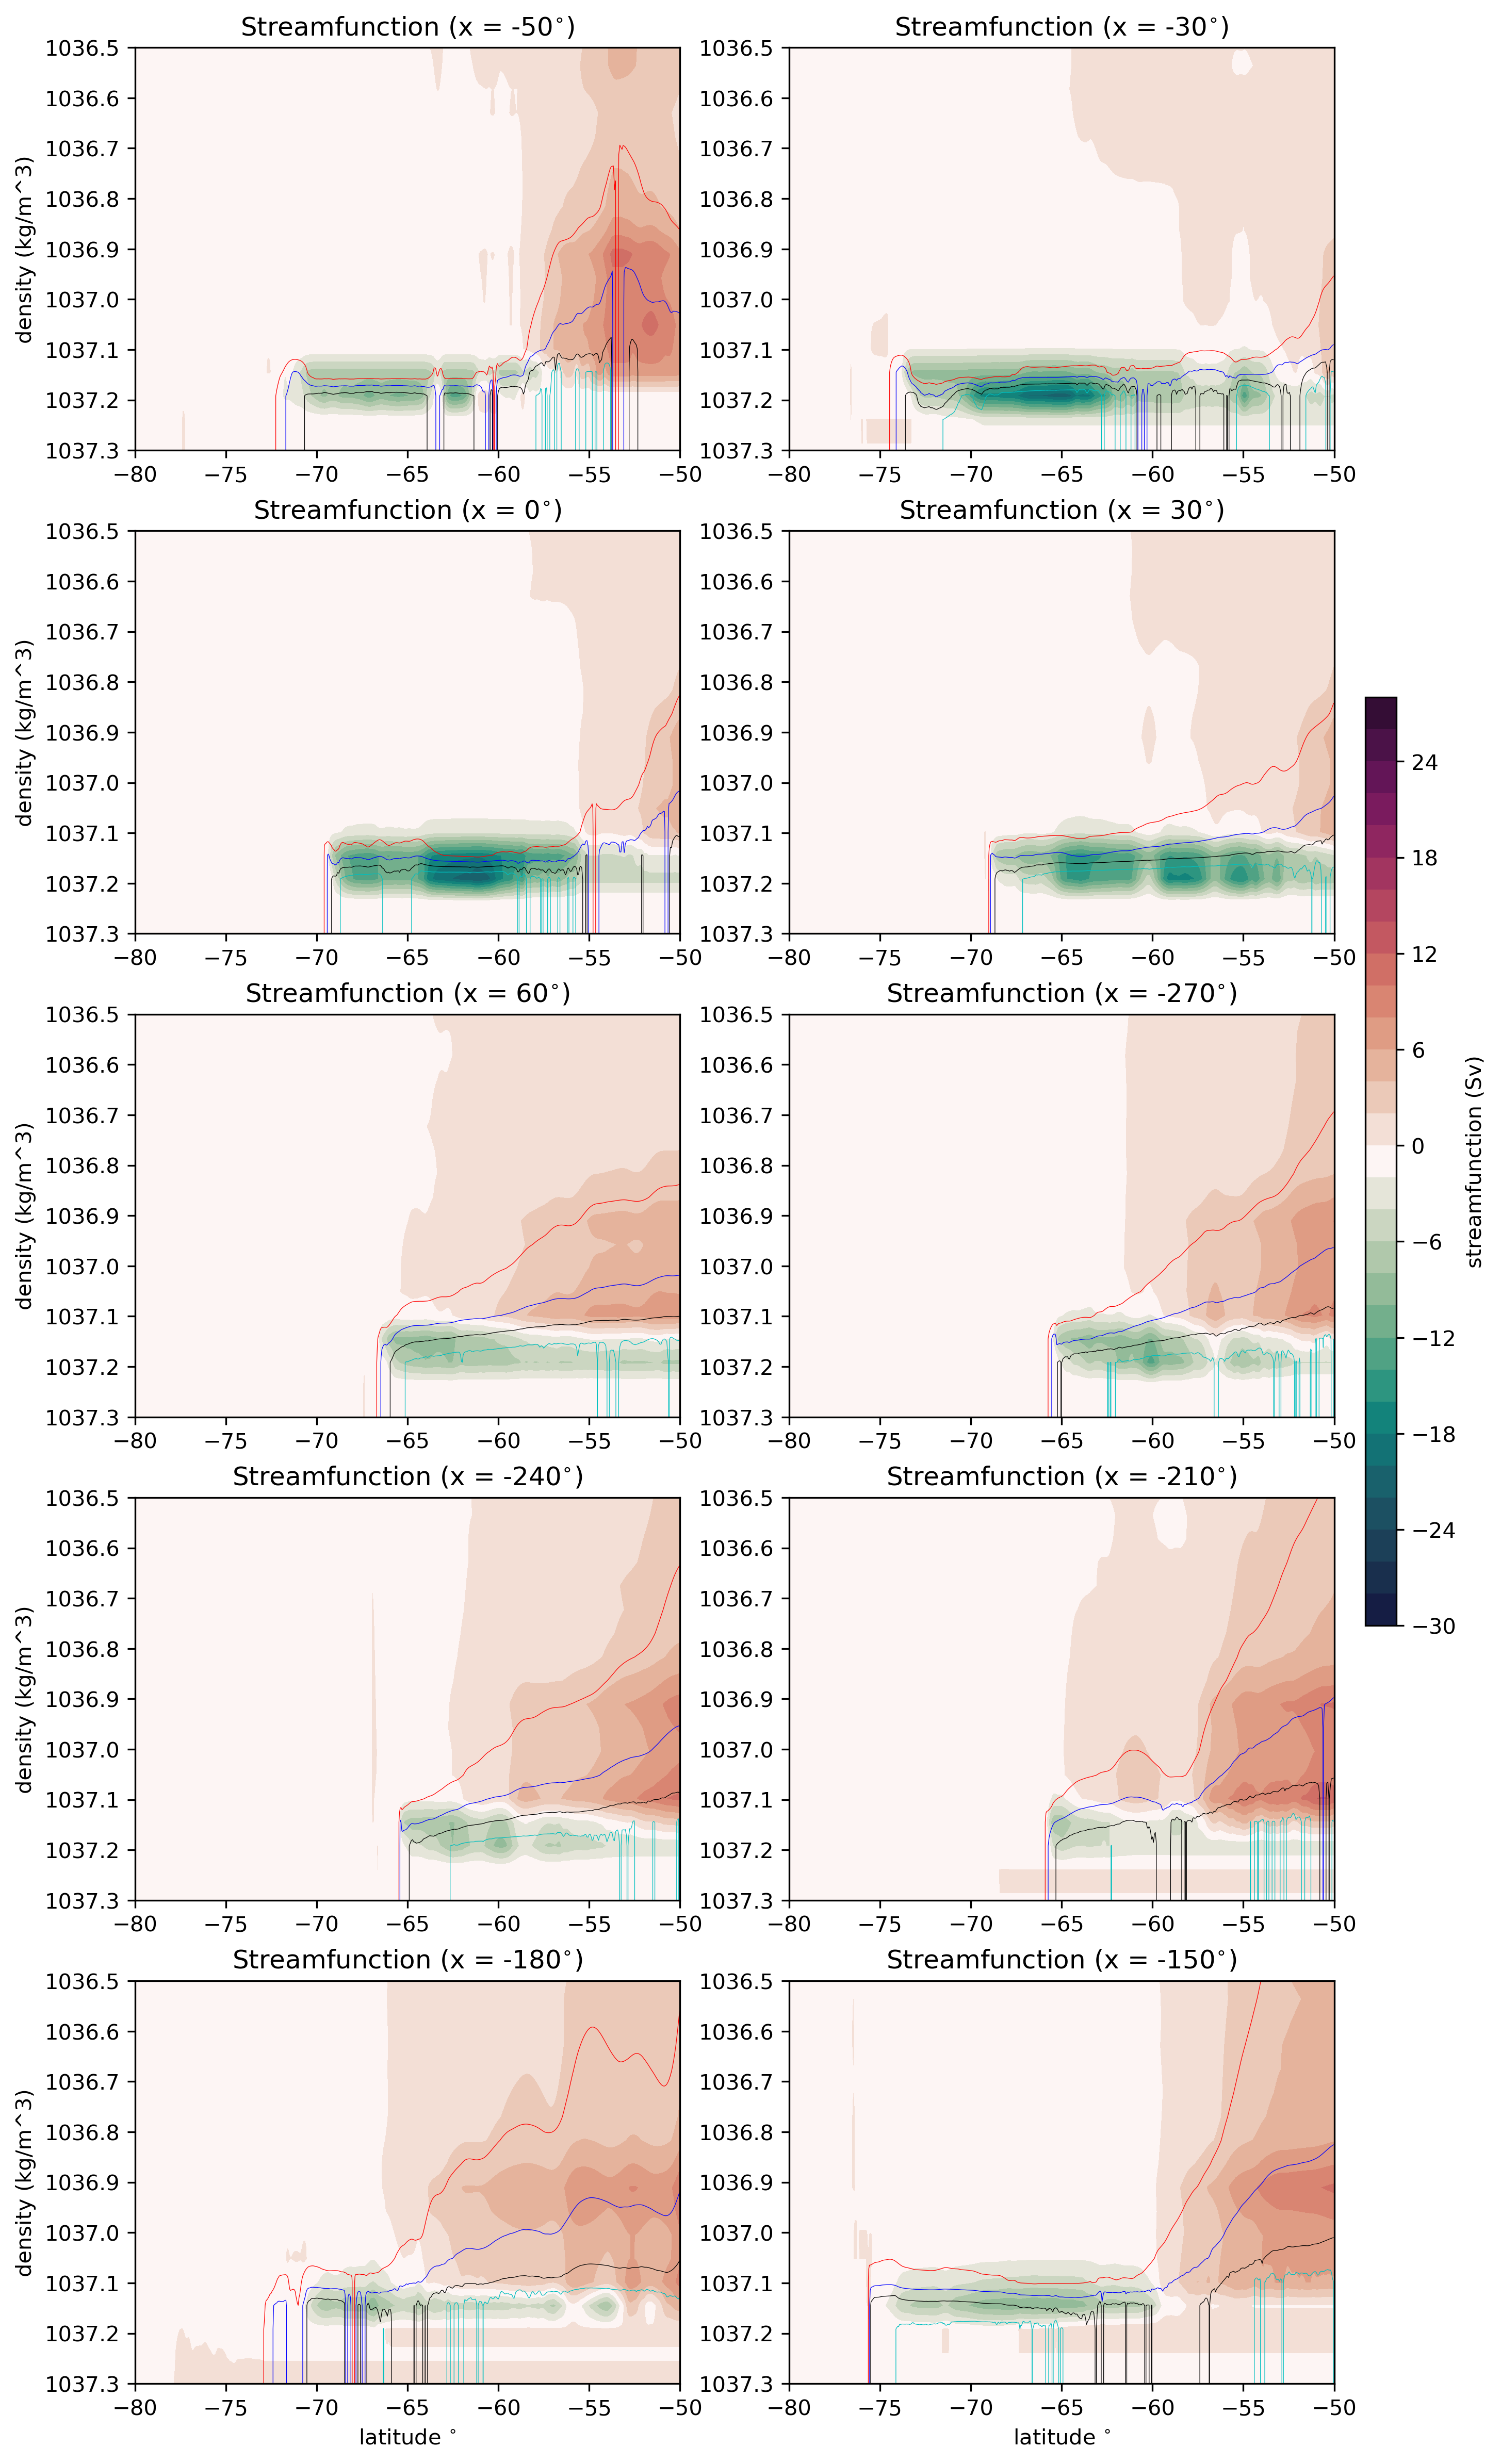

In [92]:
# plot transect
#-50
plt.figure(figsize=(10,20),dpi = 300)
ax = plt.subplot(5,2,1)
p1 = flux1.plot.contourf(ax=ax, levels = np.arange(-30,30,2),cmap=cm.cm.curl,add_colorbar=False)
depth1.plot.contour(ax=ax,levels=[1000,2000,3000,4000],linewidths = 0.3,colors=['r','b','k','c'],labels = ['1000m','2000m','3000m','4000m'], add_labels = True )
plt.ylim(1036.5,1037.3)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('density (kg/m^3)')
ax.set_title('Streamfunction (x = -50$^{\circ}$)')

#-30
ax = plt.subplot(5,2,2)
p1 = flux2.plot.contourf(ax=ax, levels = np.arange(-30,30,2),cmap=cm.cm.curl,add_colorbar=False)
depth2.plot.contour(ax=ax,levels=[1000,2000,3000,4000],linewidths = 0.3,colors=['r','b','k','c'])
plt.ylim(1036.5,1037.3)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Streamfunction (x = -30$^{\circ}$)')


#0
ax = plt.subplot(5,2,3)
p1 = flux3.plot.contourf(ax=ax, levels = np.arange(-30,30,2),cmap=cm.cm.curl,add_colorbar=False)
depth3.plot.contour(ax=ax,levels=[1000,2000,3000,4000],linewidths = 0.3,colors=['r','b','k','c'])
plt.ylim(1036.5,1037.3)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('density (kg/m^3)')
ax.set_title('Streamfunction (x = 0$^{\circ}$)')

#30
ax = plt.subplot(5,2,4)
p1 = flux4.plot.contourf(ax=ax, levels = np.arange(-30,30,2),cmap=cm.cm.curl,add_colorbar=False)
depth4.plot.contour(ax=ax,levels=[1000,2000,3000,4000],linewidths = 0.3,colors=['r','b','k','c'])
plt.ylim(1036.5,1037.3)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Streamfunction (x = 30$^{\circ}$)')

#60
ax = plt.subplot(5,2,5)
p1 = flux5.plot.contourf(ax=ax, levels = np.arange(-30,30,2),cmap=cm.cm.curl,add_colorbar=False)
depth5.plot.contour(ax=ax,levels=[1000,2000,3000,4000],linewidths = 0.3,colors=['r','b','k','c'])
plt.ylim(1036.5,1037.3)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('density (kg/m^3)')
ax.set_title('Streamfunction (x = 60$^{\circ}$)')

#-270
ax = plt.subplot(5,2,6)
p1 = flux6.plot.contourf(ax=ax, levels = np.arange(-30,30,2),cmap=cm.cm.curl,add_colorbar=False)
depth6.plot.contour(ax=ax,levels=[1000,2000,3000,4000],linewidths = 0.3,colors=['r','b','k','c'])
plt.ylim(1036.5,1037.3)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Streamfunction (x = -270$^{\circ}$)')

#-240
ax = plt.subplot(5,2,7)
p1 = flux7.plot.contourf(ax=ax, levels = np.arange(-30,30,2),cmap=cm.cm.curl,add_colorbar=False)
depth7.plot.contour(ax=ax,levels=[1000,2000,3000,4000],linewidths = 0.3,colors=['r','b','k','c'])
plt.ylim(1036.5,1037.3)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('density (kg/m^3)')
ax.set_title('Streamfunction (x = -240$^{\circ}$)')

#-210
ax = plt.subplot(5,2,8)
p1 = flux8.plot.contourf(ax=ax, levels = np.arange(-30,30,2),cmap=cm.cm.curl,add_colorbar=False)
depth8.plot.contour(ax=ax,levels=[1000,2000,3000,4000],linewidths = 0.3,colors=['r','b','k','c'])
plt.ylim(1036.5,1037.3)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Streamfunction (x = -210$^{\circ}$)')

#-180
ax = plt.subplot(5,2,9)
p1 = flux9.plot.contourf(ax=ax, levels = np.arange(-30,30,2),cmap=cm.cm.curl,add_colorbar=False)
p2 = depth9.plot.contour(ax=ax,levels=[1000,2000,3000,4000],linewidths = 0.3,colors=['r','b','k','c'])
plt.ylim(1036.5,1037.3)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
plt.xlabel('latitude $^{\circ}$')
plt.ylabel('density (kg/m^3)')
ax.set_title('Streamfunction (x = -180$^{\circ}$)')

#-150
ax = plt.subplot(5,2,10)
p1 = flux10.plot.contourf(ax=ax, levels = np.arange(-30,30,2),cmap=cm.cm.curl,add_colorbar=False)
depth10.plot.contour(ax=ax,levels=[1000,2000,3000,4000],linewidths = 0.3,colors=['r','b','k','c'])
plt.ylim(1036.5,1037.3)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
plt.xlabel('latitude $^{\circ}$')
ax.set(ylabel = None)
ax.set_title('Streamfunction (x = -150$^{\circ}$)')

# add the colorabr and legend
# add the colorbar
ax = plt.axes([0.92, 0.37, 0.02, 0.3])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'both')
cb.ax.set_ylabel('streamfunction (Sv)')